# Decision Trees and Random Forests

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Data

In [85]:
df = pd.read_csv('kyphosis.csv')

In [86]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


# EDA

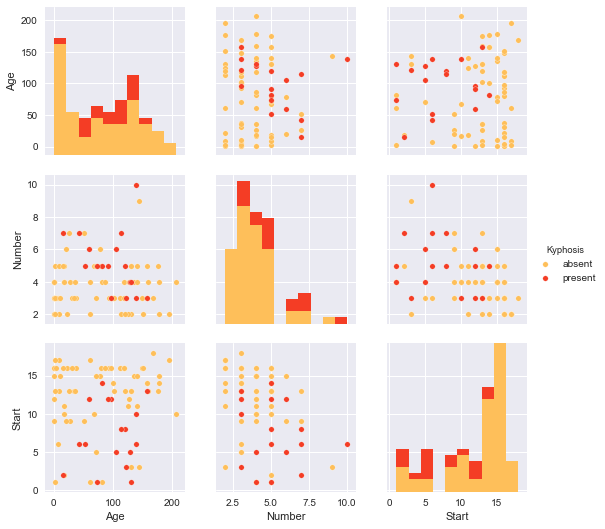

In [6]:
sns.pairplot(df, hue='Kyphosis', plot_kws={'s':30, 'edgecolor':'w'}, palette='YlOrRd')

## Split the Data

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X = df.drop('Kyphosis', axis=1)

In [90]:
y = df['Kyphosis']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dtree = DecisionTreeClassifier()

In [76]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [77]:
predictions = dtree.predict(X_test)

## Decision Tree Model Evaluation

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[12  9]
 [ 1  3]]


             precision    recall  f1-score   support

     absent       0.92      0.57      0.71        21
    present       0.25      0.75      0.38         4

avg / total       0.82      0.60      0.65        25



## Random Forests

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rfc = RandomForestClassifier()

In [82]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [83]:
rfc_pred = rfc.predict(X_test)

## Random Forests Model Evaluation

In [84]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[19  2]
 [ 1  3]]


             precision    recall  f1-score   support

     absent       0.95      0.90      0.93        21
    present       0.60      0.75      0.67         4

avg / total       0.89      0.88      0.89        25

